In [27]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device =='cuda':
    torch.cuda.manual_seed_all(777)


training_epochs = 10
batch_size = 100

#dataloader
mnist_train = dsets.MNIST(root = 'MNIST_data/',
                          train = True,
                          transform = transforms.ToTensor(),
                          download=True)
mnist_test = dsets.MNIST(root = 'MNIST_data/',
                          train = False,
                          transform = transforms.ToTensor(),
                          download=True)

data_loader = torch.utils.data.DataLoader(dataset = mnist_train,
                                          batch_size =batch_size,
                                          shuffle = True,
                                          drop_last = True)

print("step1")

step1


In [28]:
class CNN_parameter():
    def __init__(self, fn_pool, fn_fcinit, fn_act, lr, casename ):
        self.fn_pool = fn_pool
        self.fn_fcinit= fn_fcinit
        self.fn_act = fn_act
        self.lr = lr
        self.paramter_name = casename



class CNN(torch.nn.Module):
    def __init__(self, nn_param:CNN_parameter ):
        super(CNN,self).__init__()
        self.keep_prob = 0.5
        #L1 image in shape = (?,28,28,1)
        #    conv -> (?, 28, 28, 6)
        #    pool -> (?, 14, 14, 6)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2),
            nn_param.fn_act(),
            nn_param.fn_pool(kernel_size=2,stride=2)
        )

        #L2 image in shape = (?, 14,14,6)
        #   conv -> (?,10,10,16)
        #   pool -> (?,5,5,16)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(6, 16 , kernel_size=5 ,stride=1, padding=0),
            nn_param.fn_act(),
            nn_param.fn_pool(kernel_size=2,stride=2)
        )

        #Fully connected Layer 5*5*16
        self.fc1 = torch.nn.Linear(5*5*16, 120, bias=True)
        nn_param.fn_fcinit(self.fc1.weight)

        self.layer3 = torch.nn.Sequential(
            self.fc1,
            nn_param.fn_act()
            #,torch.nn.Dropout(p=1-self.keep_prob)
        )
        #Fully connected Layer 120->84
        self.fc2 = torch.nn.Linear(120, 84, bias=True)
        nn_param.fn_fcinit(self.fc2.weight)
        self.layer4 = torch.nn.Sequential(
            self.fc2,
            nn_param.fn_act()
        )
        self.fc3 = torch.nn.Linear(84, 10, bias=True)
        nn_param.fn_fcinit(self.fc3.weight)

    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.fc3(out)
        return out


print("step2")

step2


In [34]:
net_params = []
net_params.append(CNN_parameter(torch.nn.MaxPool2d,
                                torch.nn.init.xavier_uniform,
                                torch.nn.ReLU,
                                0.001,
                                "[pool=max][init=xavier][act=relu][lr=0.001]" ))
net_params.append(CNN_parameter(torch.nn.AvgPool2d,
                                torch.nn.init.xavier_uniform,
                                torch.nn.ReLU,
                                0.001,
                                "[pool=avg][init=xavier][act=relu][lr=0.001]" ))

#----
net_params.append(CNN_parameter(torch.nn.MaxPool2d,
                                torch.nn.init.xavier_uniform,
                                torch.nn.ReLU,
                                0.001,
                                "[pool=max][init=xavier][act=relu][lr=0.001]" ))
net_params.append(CNN_parameter(torch.nn.MaxPool2d,
                                torch.nn.init.uniform_,
                                torch.nn.ReLU,
                                0.001,
                                "[pool=max][init=uniform][act=relu][lr=0.001]" ))
net_params.append(CNN_parameter(torch.nn.MaxPool2d,
                                torch.nn.init.kaiming_uniform_,
                                torch.nn.ReLU,
                                0.001,
                                "[pool=max][init=kaiming][act=relu][lr=0.001]" ))
#----

net_params.append(CNN_parameter(torch.nn.MaxPool2d,
                                torch.nn.init.xavier_uniform,
                                torch.nn.ReLU,
                                0.001,
                                "[pool=max][init=xavier][act=relu][lr=0.001]" ))
net_params.append(CNN_parameter(torch.nn.MaxPool2d,
                                torch.nn.init.xavier_uniform,
                                torch.nn.Tanh,
                                0.001,
                                "[pool=max][init=xavier][act=Tanh][lr=0.001]" ))
net_params.append(CNN_parameter(torch.nn.MaxPool2d,
                                torch.nn.init.xavier_uniform,
                                torch.nn.LeakyReLU,
                                0.001,
                                "[pool=max][init=xavier][act=LeakyReLU][lr=0.001]" ))
net_params.append(CNN_parameter(torch.nn.MaxPool2d,
                                torch.nn.init.xavier_uniform,
                                torch.nn.LeakyReLU,
                                0.001,
                                "[pool=max][init=xavier][act=Sigmoid][lr=0.001]" ))

#---
net_params.append(CNN_parameter(torch.nn.MaxPool2d,
                                torch.nn.init.xavier_uniform,
                                torch.nn.ReLU,
                                0.01,
                                "[pool=max][init=xavier][act=relu][lr=0.01]" ))
net_params.append(CNN_parameter(torch.nn.MaxPool2d,
                                torch.nn.init.xavier_uniform,
                                torch.nn.ReLU,
                                0.005,
                                "[pool=max][init=xavier][act=relu][lr=0.005]" ))

net_params.append(CNN_parameter(torch.nn.MaxPool2d,
                                torch.nn.init.xavier_uniform,
                                torch.nn.ReLU,
                                0.0001,
                                "[pool=max][init=xavier][act=relu][lr=0.0001]" ))
net_params.append(CNN_parameter(torch.nn.MaxPool2d,
                                torch.nn.init.xavier_uniform,
                                torch.nn.ReLU,
                                0.0005,
                                "[pool=max][init=xavier][act=relu][lr=0.0005]" ))

print("step3")

step3


In [33]:
#training
def training_loop():
    for i, np in enumerate(net_params):
        print(i, np.paramter_name)
        model = CNN(np).to(device)
        criterion = torch.nn.CrossEntropyLoss().to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=np.lr)
        total_batch = len(data_loader)
        print("total batch  ", total_batch)

        for epoch in range(training_epochs):
            avg_cost = 0
            true_count = 0

            for X, Y in data_loader:
                X=X.to(device)
                Y=Y.to(device)

                optimizer.zero_grad()
                hypothesys = model(X)
                cost = criterion(hypothesys, Y)
                cost.backward()
                optimizer.step()
                correct_prediction = torch.argmax(hypothesys, dim = 1) ==Y
                true_count += correct_prediction.float().sum()

                avg_cost += cost / total_batch

            print("epoch={:>4}\tcost={:>.9f}\taccuracy={:>.9f}\ttrue={}".format(
                epoch+1, avg_cost, true_count/total_batch, true_count))
        model_filepath="model/m{}.m".format(np.paramter_name)
        torch.save(model, model_filepath)

#start training
training_loop()

0 [pool:max][init:xavier][act:relu][lr:0.001]
total batch   600


C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_4312/2611380333.py:35: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn_param.fn_fcinit(self.fc1.weight)
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_4312/2611380333.py:44: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn_param.fn_fcinit(self.fc2.weight)
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_4312/2611380333.py:50: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn_param.fn_fcinit(self.fc3.weight)


epoch=   1	cost=0.287205845	accuracy=91.258338928	true=54755.0
epoch=   2	cost=0.073540345	accuracy=97.636665344	true=58582.0
epoch=   3	cost=0.053582806	accuracy=98.333335876	true=59000.0
epoch=   4	cost=0.042736679	accuracy=98.660003662	true=59196.0
epoch=   5	cost=0.033939850	accuracy=98.923332214	true=59354.0
epoch=   6	cost=0.029387919	accuracy=99.051666260	true=59431.0
epoch=   7	cost=0.024364755	accuracy=99.241668701	true=59545.0
epoch=   8	cost=0.022274848	accuracy=99.273338318	true=59564.0
epoch=   9	cost=0.018105598	accuracy=99.406669617	true=59644.0
epoch=  10	cost=0.015726255	accuracy=99.488334656	true=59693.0


OSError: [Errno 22] Invalid argument: 'model/[pool:max][init:xavier][act:relu][lr:0.001].m'

In [32]:
#test
model = CNN(net_params[0]).to(device)

criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=net_params[0].lr)

total_batch = len(data_loader)
print("total batch  ", total_batch)


for epoch in range(training_epochs):
    avg_cost = 0
    true_count = 0

    for X, Y in data_loader:
        X=X.to(device)
        Y=Y.to(device)

        optimizer.zero_grad()
        hypothesys = model(X)
        cost = criterion(hypothesys, Y)
        cost.backward()
        optimizer.step()
        correct_prediction = torch.argmax(hypothesys, dim = 1) ==Y
        true_count += correct_prediction.float().sum()

        avg_cost += cost / total_batch

    print("epoch {:>4} cost={:>.9f} accuracy={:>.9f}, true={}".format(
        epoch+1, avg_cost, true_count/total_batch, true_count))

#torch.save(model, "model/model_epoch20.m")

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_4312/2611380333.py:35: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn_param.fn_fcinit(self.fc1.weight)
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_4312/2611380333.py:44: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn_param.fn_fcinit(self.fc2.weight)
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_4312/2611380333.py:50: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn_param.fn_fcinit(self.fc3.weight)


total batch   600
epoch    1 cost=0.261725068 accuracy=92.381668091, true=55429.0
epoch    2 cost=0.074790083 accuracy=97.738334656, true=58643.0
epoch    3 cost=0.052710231 accuracy=98.388336182, true=59033.0
epoch    4 cost=0.041331772 accuracy=98.675003052, true=59205.0
epoch    5 cost=0.034378603 accuracy=98.913337708, true=59348.0
epoch    6 cost=0.027926546 accuracy=99.116668701, true=59470.0
epoch    7 cost=0.023650762 accuracy=99.251670837, true=59551.0
epoch    8 cost=0.021774780 accuracy=99.268333435, true=59561.0
epoch    9 cost=0.017758185 accuracy=99.404998779, true=59643.0
epoch   10 cost=0.015697945 accuracy=99.495002747, true=59697.0


Accuracy :  0.9890999794006348
1) Label=5, Prediction=5 


C:\anaconda3\envs\pytorch04\lib\site-packages\torchvision\datasets\mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\anaconda3\envs\pytorch04\lib\site-packages\torchvision\datasets\mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


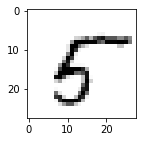

2) Label=7, Prediction=7 


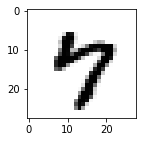

3) Label=8, Prediction=8 


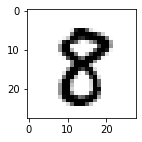

4) Label=3, Prediction=3 


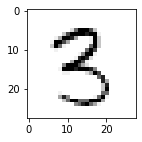

5) Label=3, Prediction=3 


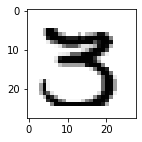

160) Label=4, Prediction=8 


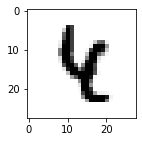

247) Label=4, Prediction=2 


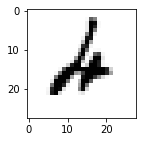

321) Label=2, Prediction=7 


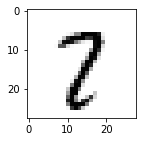

435) Label=8, Prediction=9 


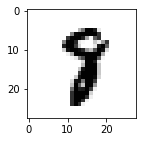

445) Label=6, Prediction=0 


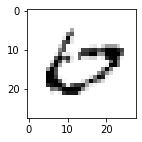

551) Label=7, Prediction=9 


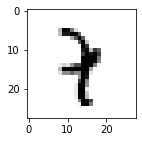

582) Label=8, Prediction=2 


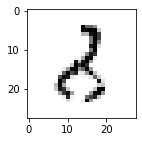

583) Label=2, Prediction=7 


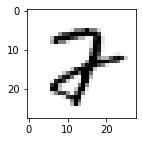

625) Label=6, Prediction=4 


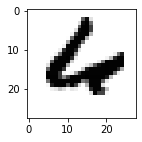

659) Label=2, Prediction=7 


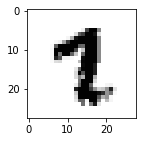

In [26]:
import matplotlib.pyplot as plt
import random
model = torch.load( "model/model_epoch20.m")
with torch.no_grad():
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, dim = 1) ==Y_test
    accuracy = correct_prediction.float().mean()
    print("Accuracy : ", accuracy.item())

    for count in range(5):
        #MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
        r = random.randint(0, len(mnist_test)- 1)
        X_single_data = mnist_test.test_data[r:r+1].view(-1,1,28,28).float().to(device)
        #print(X_single_data.dim())
        Y_single_data = mnist_test.test_labels[r:r+1].to(device)
        single_prediction = model(X_single_data)
        print('{}) Label={}, Prediction={} '.format(count+1,
            Y_single_data.item(), torch.argmax(single_prediction, dim=1).item()))
        plt.figure(figsize = (2,2))
        plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap='Greys',interpolation='nearest')
        plt.show()

    fault_count =0
    for i, f_item in enumerate(correct_prediction):
        if not f_item and i < (len(mnist_test)- 2) and fault_count < 10:
            X_data = mnist_test.test_data[i:i+1].view(-1,1,28,28).float().to(device)
            Y_data = mnist_test.test_labels[i:i+1].to(device)
            F_prediction = model(X_data)
            fault_count += 1
            print('{}) Label={}, Prediction={} '.format(i,
                                       Y_data.item(), torch.argmax(F_prediction, dim=1).item()))
            plt.figure(figsize = (2,2))
            plt.imshow(mnist_test.test_data[i:i+1].view(28,28), cmap='Greys',interpolation='nearest')
            plt.show()


4
Label 4
Prediction:  4


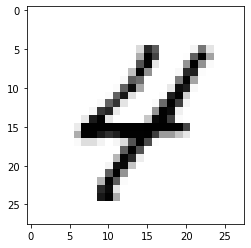

In [39]:

import matplotlib.pyplot as plt
import random

#MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
r = random.randint(0, len(mnist_test)- 1)
X_single_data = mnist_test.test_data[r:r+1].view(-1,1,28,28).float().to(device)
print(X_single_data.dim())
Y_single_data = mnist_test.test_labels[r:r+1].to(device)

print('Label', Y_single_data.item())
single_prediction = model(X_single_data)
print('Prediction: ', torch.argmax(single_prediction, 1).item())

plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap='Greys',interpolation='nearest')
plt.show()